# Two-Dimensional Fourier Transforms

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters course Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

First a function is defined which computes the two-dimensional Fourier transform of a two-dimensional signal and plots the resulting spectrum.

In [1]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def Fourier_transform(f):
    # computes and plots the magnitude spectrum
    
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    F = F / np.max(np.abs(F))
    magnitude_spectrum = 20*np.log(np.abs(F))

    plt.figure(figsize=(6,6))
    plt.imshow(np.real(f), cmap = 'gray')
    plt.title('$p(x, y)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

    plt.figure(figsize=(7,6))
    plt.imshow(magnitude_spectrum, cmap = 'gray', extent=[-f.shape[1]/2, f.shape[1]/2, -f.shape[0]/2, f.shape[0]/2])
    plt.title(r'$|\tilde{p}(k_x, k_y)|$ in dB')
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.colorbar(fraction=0.042, pad=0.04)

## Single Plane Wave

The two-dimensional Fourier transform of a two-dimensional plane wave is considered. First the sound field is computed, followed by the computation of its Fourier transform. Both the sound field as well as its Fourier transform are plotted.

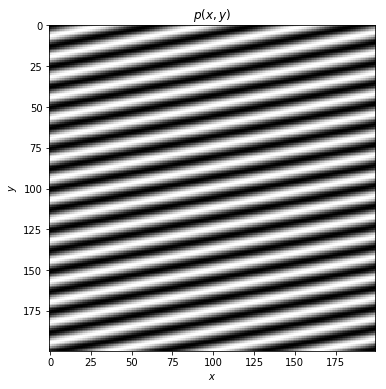

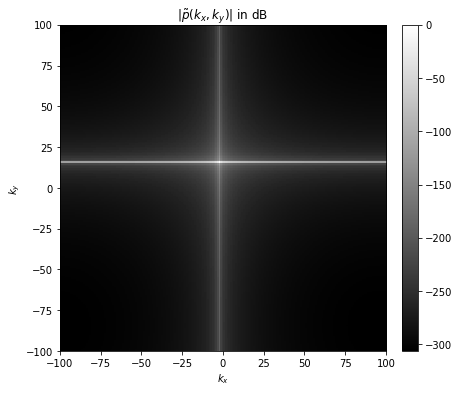

In [2]:
kx = 1
ky = 5

X,Y = np.meshgrid(np.linspace(-10, 10, num=200), np.linspace(-10, 10, num=200))
p = np.exp(-1j*(kx*X + ky*Y))

Fourier_transform(p)

## Multiple Plane Waves

Now a superposition of multiple plane waves is considered

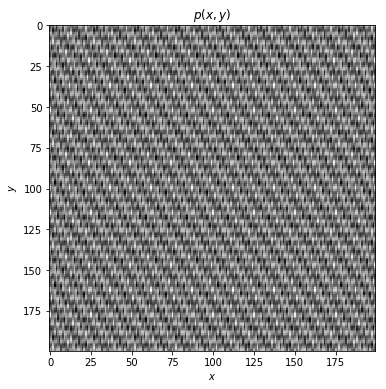

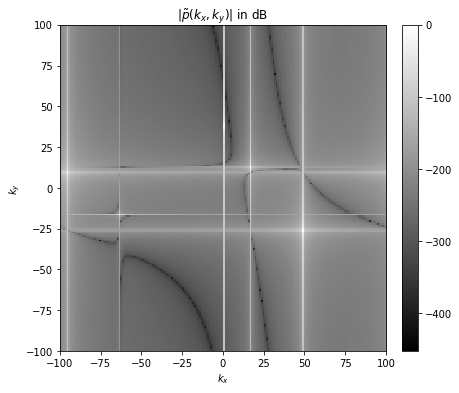

In [3]:
p = np.zeros(X.shape)
kx = [-5, -15, 0, 20, 30]
ky = [4, -8, 12, -5, 3]

for n in range(5):
    X,Y = np.meshgrid(np.linspace(-10, 10, num=200), np.linspace(-10, 10, num=200))
    p = p + np.exp(-1j*(kx[n]*X + ky[n]*Y))

Fourier_transform(p)

## Natural Image

The last example shows the two-dimensional Fourier transform of a grayscale image.

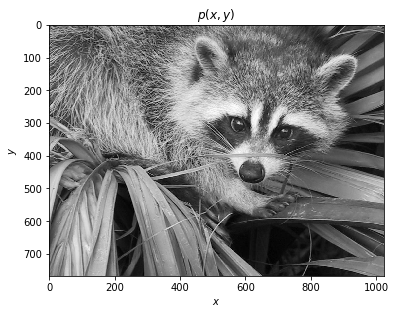

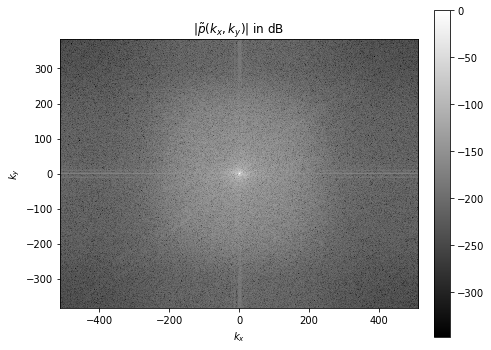

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

f = rgb2gray(misc.face())
Fourier_transform(f)

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.